In [114]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
import pydotplus



In [111]:
# Load the dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

In [83]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [84]:
# Explore the dataset
print(X.describe())
print(X.isnull().sum())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [85]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [86]:
# handling the outliers
z_scores = np.abs(stats.zscore(X))
X = X[(z_scores < 3).all(axis=1)]
y = y[(z_scores < 3).all(axis=1)]

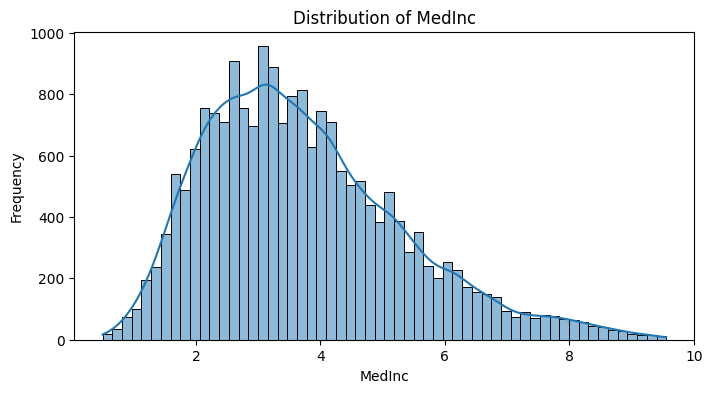

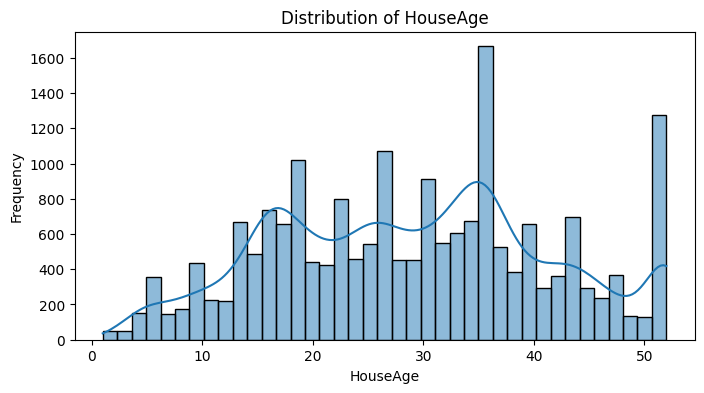

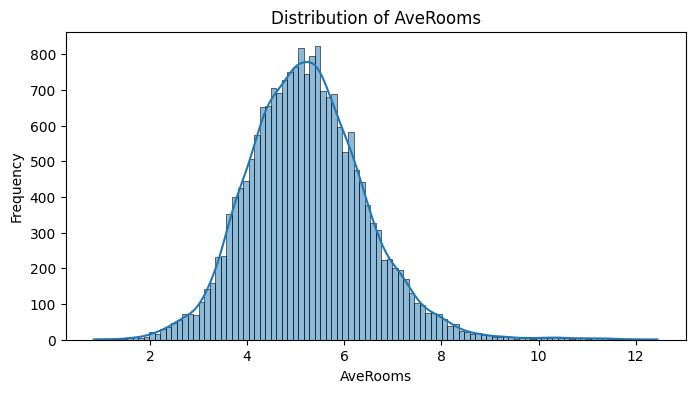

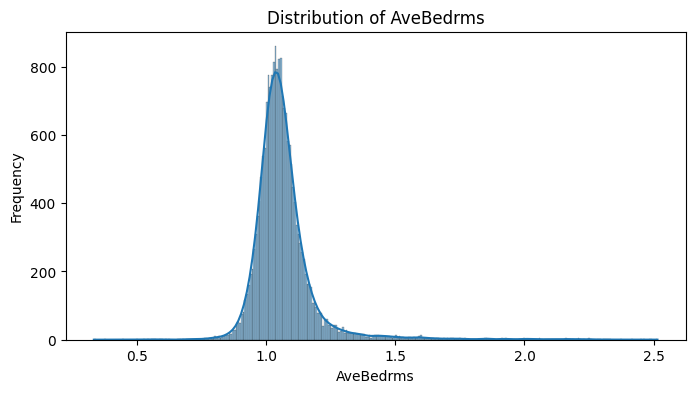

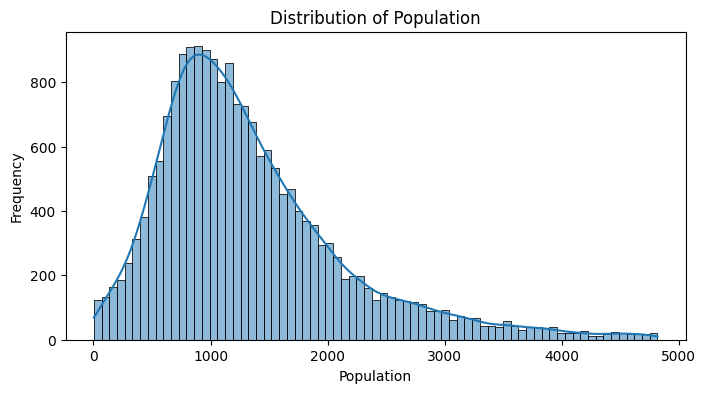

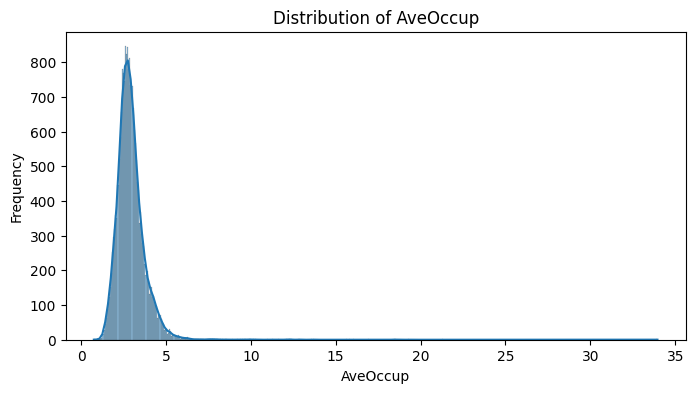

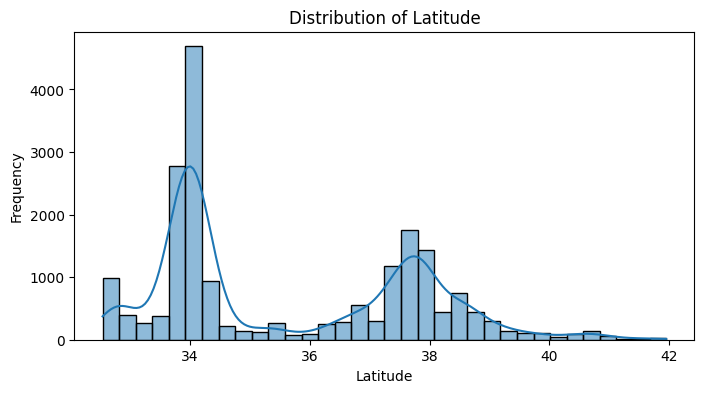

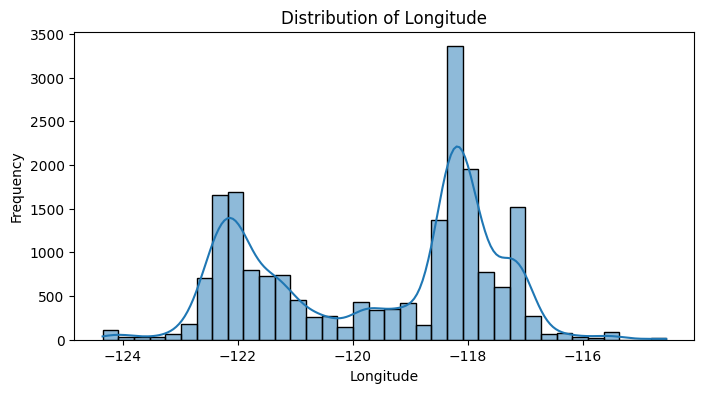

In [87]:
# Visualize distributions of each feature
for col in X.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[col], kde=True)
    
    # Axis titles
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot title
    plot_title = f'Distribution of {col}'
    plt.title(plot_title)
    plt.show()

In [88]:
# For the feature correlation heatmap
# correlation_matrix = X.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# # Axis titles for the heatmap
# plt.xlabel('Features')
# plt.ylabel('Features')

# # Heatmap title
# plt.title("Correlation Matrix of Housing Features")
# plt.show()

### 2. Linear Regression:

In [89]:
# train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [90]:
# Predict and evaluate
y_pred_lin_reg = lin_reg.predict(X_test_scaled)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print("Predicted values:", y_pred_lin_reg[:10])

print("LR_MSE:", mse_lin_reg)
print("LR_R2 Score:", r2_lin_reg)
accuracy_percentage = r2_lin_reg * 100
print(f"L_R Model Accuracy: {accuracy_percentage:.2f}%")

Predicted values: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725 2.01175367
 2.64550005 2.16875532 2.74074644 3.91561473]
LR_MSE: 0.5558915986952442
LR_R2 Score: 0.575787706032451
L_R Model Accuracy: 57.58%


### 3. Artificial Neural Network (ANN):

In [67]:
# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the ANN
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)


In [100]:
# Predict and evaluate
y_pred_ann = model.predict(X_test_scaled).flatten()
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("ANN MSE:", mse_ann)
print("ANN R2 Score:", r2_ann)


129/129 [==============================] - 0s 830us/step
ANN MSE: 4.756523865552973
ANN R2 Score: -2.6298010350464454


### Neural Network Architecture for Regression

In [95]:
# take the total number of features in the dataset
n_features = X_train_scaled.shape[1]  

model = Sequential()
# First hidden layer
model.add(Dense(64, activation='relu', input_shape=(n_features,))) 
 # Second hidden layer(we can add more hidden layers if we want ) 
model.add(Dense(32, activation='relu')) 

# Output layer for regression
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                576       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 


Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. comparing tht model's performance using the same  metrics 

In [68]:
print("Linear Regression vs ANN")
print("MSE: {:.3f} vs {:.3f}".format(mse_lin_reg, mse_ann))
print("R2 Score: {:.3f} vs {:.3f}".format(r2_lin_reg, r2_ann))

Linear Regression vs ANN
MSE: 0.556 vs 0.272
R2 Score: 0.576 vs 0.792



### 4. Discuss the strengths and weaknesses of each model.

<h4>Linear Regression</h4>
Strengths:

--Simplicity and Interpretability: Linear Regression is straightforward and easy to understand. It clearly shows how each feature affects the prediction, which is beneficial for understanding the relationship between features and house prices.

--Efficiency: It is computationally efficient, making it a quick solution for predicting house prices, especially with smaller datasets.

-Less Prone to Overfitting: Linear Regression, particularly with regularization, is less likely to overfit on the training data, a crucial factor for reliable predictions.

Weaknesses:

--Assumption of Linearity: Linear Regression assumes that the relationship between features and the target (house prices) is linear. This can limit its effectiveness if the actual relationships are complex or non-linear.

--Sensitivity to Outliers: It can be significantly affected by outliers in the data, which can lead to skewed predictions.

<h4>Artificial Neural Networks (ANNs)</h4>
Strengths:

--Handling Complex Relationships: ANNs are excellent for modeling complex, non-linear relationships, which might be present in the California Housing dataset.

--Flexibility: They can model intricate patterns in the data due to their flexible architecture, potentially leading to more accurate predictions for house prices.

--Powerful with Large Datasets: ANNs are particularly effective when there's a large amount of data, as they can learn more complex patterns.

Weaknesses:

--Need for More Data: To perform effectively, ANNs generally require more extensive datasets. For smaller datasets, they might not perform as well as simpler models.

--Computational Demand: They are more computationally intensive, requiring more time and resources for training and prediction.

--Risk of Overfitting: ANNs can overfit to training data, especially if the network is too complex or not enough regularization is applied.

### 4. Analyze whether the complexity of an ANN provides better predictive performance compared to Linear Regression.

MSE (Mean Squared Error):
Linear Regression: 0.556  & ANN: 0.272
Lower MSE values are better as they indicate smaller average errors in predictions. The ANN's MSE is significantly lower than that of Linear Regression, suggesting that the ANN model has a better fit and makes more accurate predictions on this dataset.

R2 Score:
Linear Regression: 0.576 & ANN: 0.792
The R2 Score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 Score is better. The R2 Score of the ANN is much higher than that of Linear Regression, indicating that it explains a greater proportion of the variance in the data.

ANN Performs Better: The ANN did a better job than Linear Regression in our tests. This means the ANN's ability to understand more complicated patterns and how different factors work together helps a lot for this kind of data.

Complex but Effective: ANNs are more complex and need more computer power, but this extra complexity helped them predict better in this situation. It seems like the data about California houses has some complicated patterns that Linear Regression can't quite catch because it only looks for simple, straight-line relationships.

When to Use ANN: For data that has these complicated patterns, ANNs might be a better choice. But it's important to remember that they need more computer resources, and there's a chance they might overfit, which means they might get too focused on the training data and not perform well on new, unseen data.

### 5. comparing  the predicted values of the two models with the actual values.

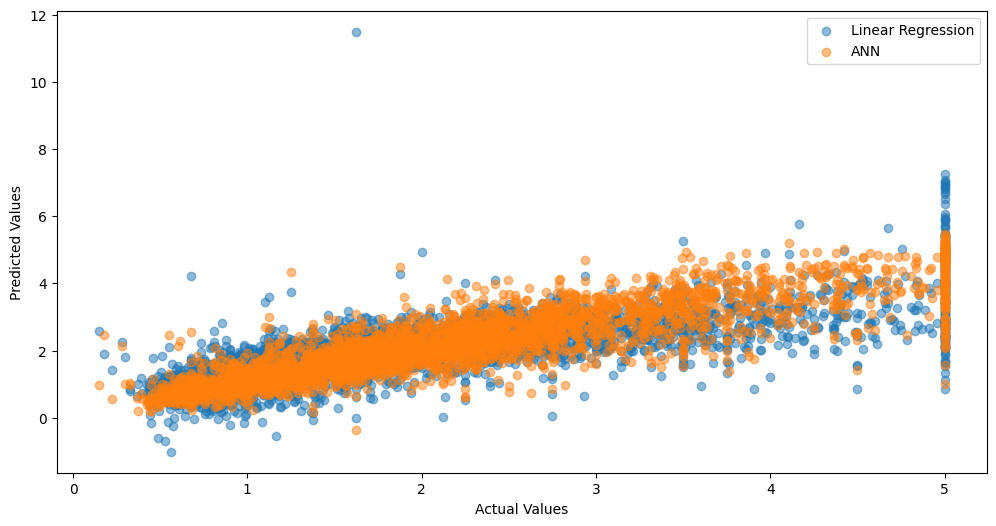

In [96]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lin_reg, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_ann, alpha=0.5, label='ANN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


### 5 . Visualize the model architectures

In [116]:
# # SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))
# (coud not run this )

### 6 . Summarizing the key findings.

Summary of Key Findings:

Performance Comparison: The Artificial Neural Network (ANN) demonstrated superior performance over Linear Regression in predicting house prices on the California Housing dataset. This was clear  from the lower Mean Squared Error (MSE) and higher R2 Score of the ANN.

ANN's Strengths: The ANN's ability to model complex, non-linear relationships in the data likely contributed to its better performance, indicating the presence of such patterns in the California Housing dataset.

Linear Regression's Limitations: Linear Regression, while simpler and more interpretable, was less effective. Its assumption of linear relationships between features and the target variable might have limited its ability to capture the complexities inherent in the dataset.

Insights into Model Performance:
ANN's Better Predictive Performance: The ANN's architecture, capable of capturing more intricate relationships in the data, made it more suited for the dataset, which presumably contained non-linear patterns and interactions among features.

Applicability of Linear Regression: Linear Regression, given its simplicity and lower computational demands, could still be a viable option for datasets with predominantly linear relationships or when a quick, initial analysis is needed.

Challenges Encountered:
Model Complexity and Training: The ANN required careful tuning of its architecture and parameters. Choosing the right number of layers and neurons and setting the correct learning rate were crucial to avoid overfitting and ensure good generalization to unseen data.

Computational Resources: Training the ANN demanded more computational resources compared to Linear Regression. Longer training times and the need for more processing power were significant considerations.

Interpretability: While the ANN excelled in performance, it lacked the interpretability of Linear Regression. Understanding how the ANN makes its predictions was more challenging, which could be a drawback in scenarios where explaining the model's decisions is critical.

Data Preprocessing: Both models required careful preprocessing of the data, including handling missing values, outliers, and feature scaling. The quality of preprocessing directly impacted model performance.

Conclusion:
The ANN emerged as the more effective model for predicting house prices in the California Housing dataset, thanks to its ability to handle complex, non-linear data. However, this came at the cost of increased computational requirements and reduced interpretability. Linear Regression, while not as accurate in this context, still holds value for its simplicity and ease of understanding, particularly in situations where model transparency is paramount or resources are limited. The choice between these models should be guided by the specific demands of the task, the nature of the data, and the balance between accuracy, interpretability, and available resources.
